In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../DataSetInput_Pipeline/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
# NEED TO ASSIGN # TO EMBARKED ELEMENTS BETWEEN 0 AND 1

In [6]:
# NORMALIZING PCLASS
p_class_max = data.Pclass.max()
data['pclass_norm'] = data['Pclass'].apply(lambda x: x/p_class_max)

In [7]:
age_max = data.Pclass.max()
data['age_norm'] = data['Age'].apply(lambda x: x/p_class_max)

In [8]:
data['sex_norm'] = data['Sex'].apply(lambda x: 0 if x=='male' else 1)

In [9]:
def embarked2num(x):
    if x == 'S':
        return 1.0
    elif x == 'C':
        return 2/3
    elif x == 'Q':
        return 1/3
    else:
        return 0
    
data['embarked_norm'] = data['Embarked'].apply(embarked2num)

In [10]:
# Pass each of the input columns into input array
inputs = data[['pclass_norm','sex_norm','age_norm','embarked_norm']].fillna(0).values

In [11]:
survived_arr = data['Survived']

In [12]:
labels = np.zeros((survived_arr.size,survived_arr.max()+1))

In [13]:
labels[np.arange(survived_arr.size),survived_arr] = 1

In [14]:
labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [15]:
dataset = tf.data.Dataset.from_tensor_slices((inputs,labels))

In [16]:
for item in dataset.take(1):
    print(item)

(<tf.Tensor: shape=(4,), dtype=float64, numpy=array([1.        , 0.        , 7.33333333, 1.        ])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([1., 0.])>)


In [17]:
dataset = dataset.shuffle(10000).batch(16,drop_remainder=True)

In [18]:
# Using sequential approach


# using 3 layers
model = tf.keras.Sequential(
    [
        #DEFINE INPUT SHAPE
        tf.keras.layers.Dense(16,input_shape=(4,), activation='relu'),
        #RECTIFIED LINEAR ACTIVATION
        tf.keras.layers.Dense(8, activation='relu'),
        #OUTPUT LAYER
        tf.keras.layers.Dense(2, activation='softmax')
    ]
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [20]:
# DEFINE TRAINING PARAMETER
# OPTIMIZER
# LOSS FUNCTION
# ACCURACY METRICS

optimizer = tf.keras.optimizers.Adam(0.001)
# BINARY WORKS ONLY IF YOU HAVE 2 UNITS IN THE OUTPUT LAYER
loss = tf.keras.losses.BinaryCrossentropy()
accuracy = tf.keras.metrics.CategoricalAccuracy('accuracy')

# COMPILE OUT MODEL
model.compile(optimizer,loss=loss, metrics=[accuracy])

In [21]:
# TRAINIGN THE DATA INTO HISTORY VARIABLE 

# epochs is the number of time the model will iterate for everysingle batch within our dataset
history = model.fit(
    dataset,epochs=50
)

Epoch 1/50
55/55 [==============================] - 1s 18ms/step - loss: 0.6885 - accuracy: 0.6114
Epoch 2/50
55/55 [==============================] - 1s 10ms/step - loss: 0.6686 - accuracy: 0.6182
Epoch 3/50
55/55 [==============================] - 1s 10ms/step - loss: 0.6462 - accuracy: 0.6398
Epoch 4/50
55/55 [==============================] - 1s 10ms/step - loss: 0.5996 - accuracy: 0.6977
Epoch 5/50
55/55 [==============================] - 1s 10ms/step - loss: 0.5565 - accuracy: 0.7602
Epoch 6/50
55/55 [==============================] - 1s 10ms/step - loss: 0.5295 - accuracy: 0.7682
Epoch 7/50
55/55 [==============================] - 1s 10ms/step - loss: 0.5040 - accuracy: 0.7864
Epoch 8/50
55/55 [==============================] - 1s 9ms/step - loss: 0.4942 - accuracy: 0.7852
Epoch 9/50
55/55 [==============================] - 1s 10ms/step - loss: 0.4845 - accuracy: 0.7875
Epoch 10/50
55/55 [==============================] - 1s 10ms/step - loss: 0.4818 - accuracy: 0.7852
Epoch 11/5

In [22]:
import matplotlib.pyplot as plt

In [23]:
num_epochs = len(history.history['accuracy'])

In [24]:
print(num_epochs)

50


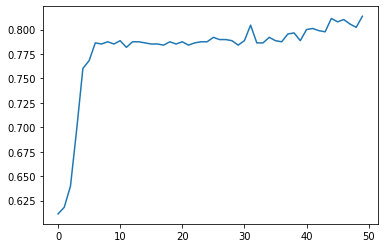

In [25]:
plt.plot(range(num_epochs),history.history['accuracy'])

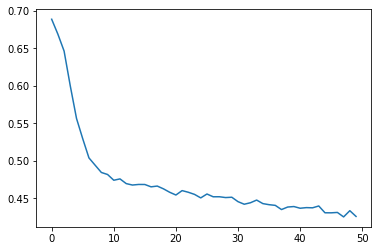

In [26]:
plt.plot(range(num_epochs),history.history['loss'])